In [20]:
!nvidia-smi

Wed May 15 22:02:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9


**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [7]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [8]:
!ls -la {HOME}/weights

total 804872
drwxr-xr-x 2 root root      4096 May 15 20:26 .
drwxr-xr-x 1 root root      4096 May 15 20:24 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt.1


In [9]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/yolov9/insan.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/yolov9/insan.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 387 layers, 25288768 parameters, 0 gradients, 102.1 GFLOPs
image 1/1 /content/yolov9/insan.jpg: 448x640 1 person, 1 dog, 122.2ms
Speed: 0.5ms pre-process, 122.2ms inference, 663.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


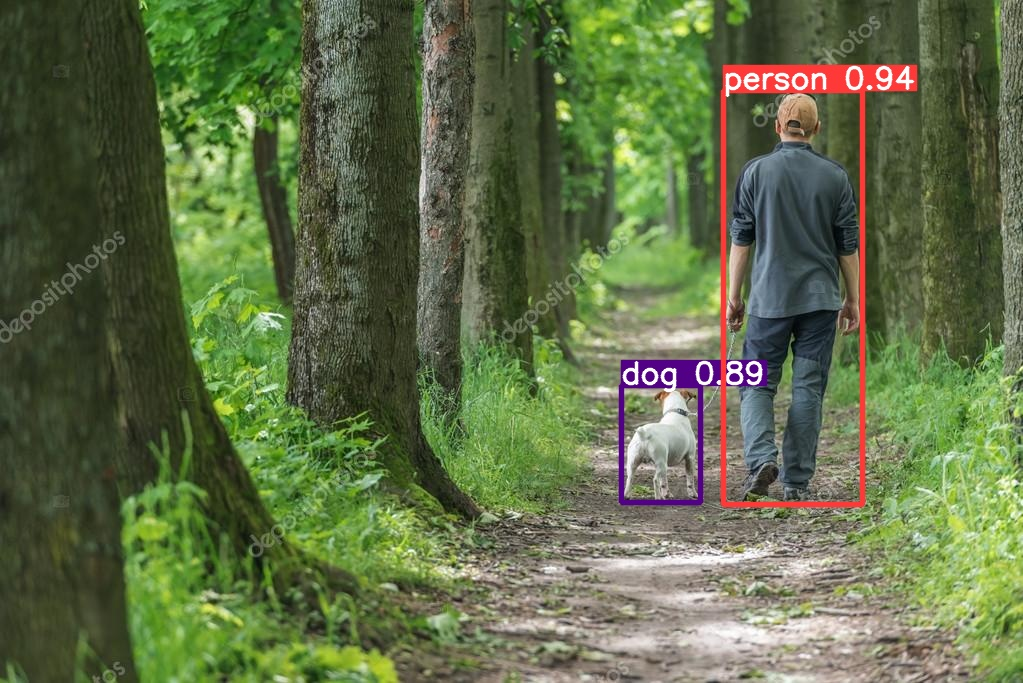

In [8]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/insan.jpg", width=800)

## yolov9-e

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [7]:
%cd {HOME}/yolov9

/content/yolov9


In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YVG0asIRIReZMKttSddm")
project = rf.workspace("roboflow-100").project("furniture-ngpea")
version = project.version(2)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to furniture-2 in yolov9:: 100%|██████████| 1390/1390 [00:00<00:00, 5550.52it/s]


## Train Custom Model

In [8]:
%pwd

'/content/yolov9'

In [20]:
!python train_dual.py --workers 8 --batch 4 --img 640 --epochs 5 --data /content/yolov9/furniture-2/data.yaml --weights /content/weights/yolov9-c.pt --device 0 --hyp /content/yolov9/data/hyps/hyp.scratch-high.yaml --cfg /content/yolov9/models/detect/yolov9-c.yaml

2024-05-15 20:42:42.732701: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 20:42:42.732757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 20:42:42.734108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 20:42:43.803458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/weights/yolov9-c.pt, cfg=/content/yolov9/models/detect/yolov9-c.yaml, data=/content/yolov9/furniture-2/data.yaml, hyp=/content/yolov9/data/hyps/hyp.scratch-high.yaml, epochs=50, batch_size=4, imgsz=640, rect=Fals

In [9]:
!python train_dual.py --weights /content/yolov9/runs/train/exp/weights/last.pt --resume

2024-05-15 20:49:22.046749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 20:49:22.046804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 20:49:22.048255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 20:49:23.667547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/yolov9/runs/train/exp/weights/last.pt, cfg=yolo.yaml, data=data/coco.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanch

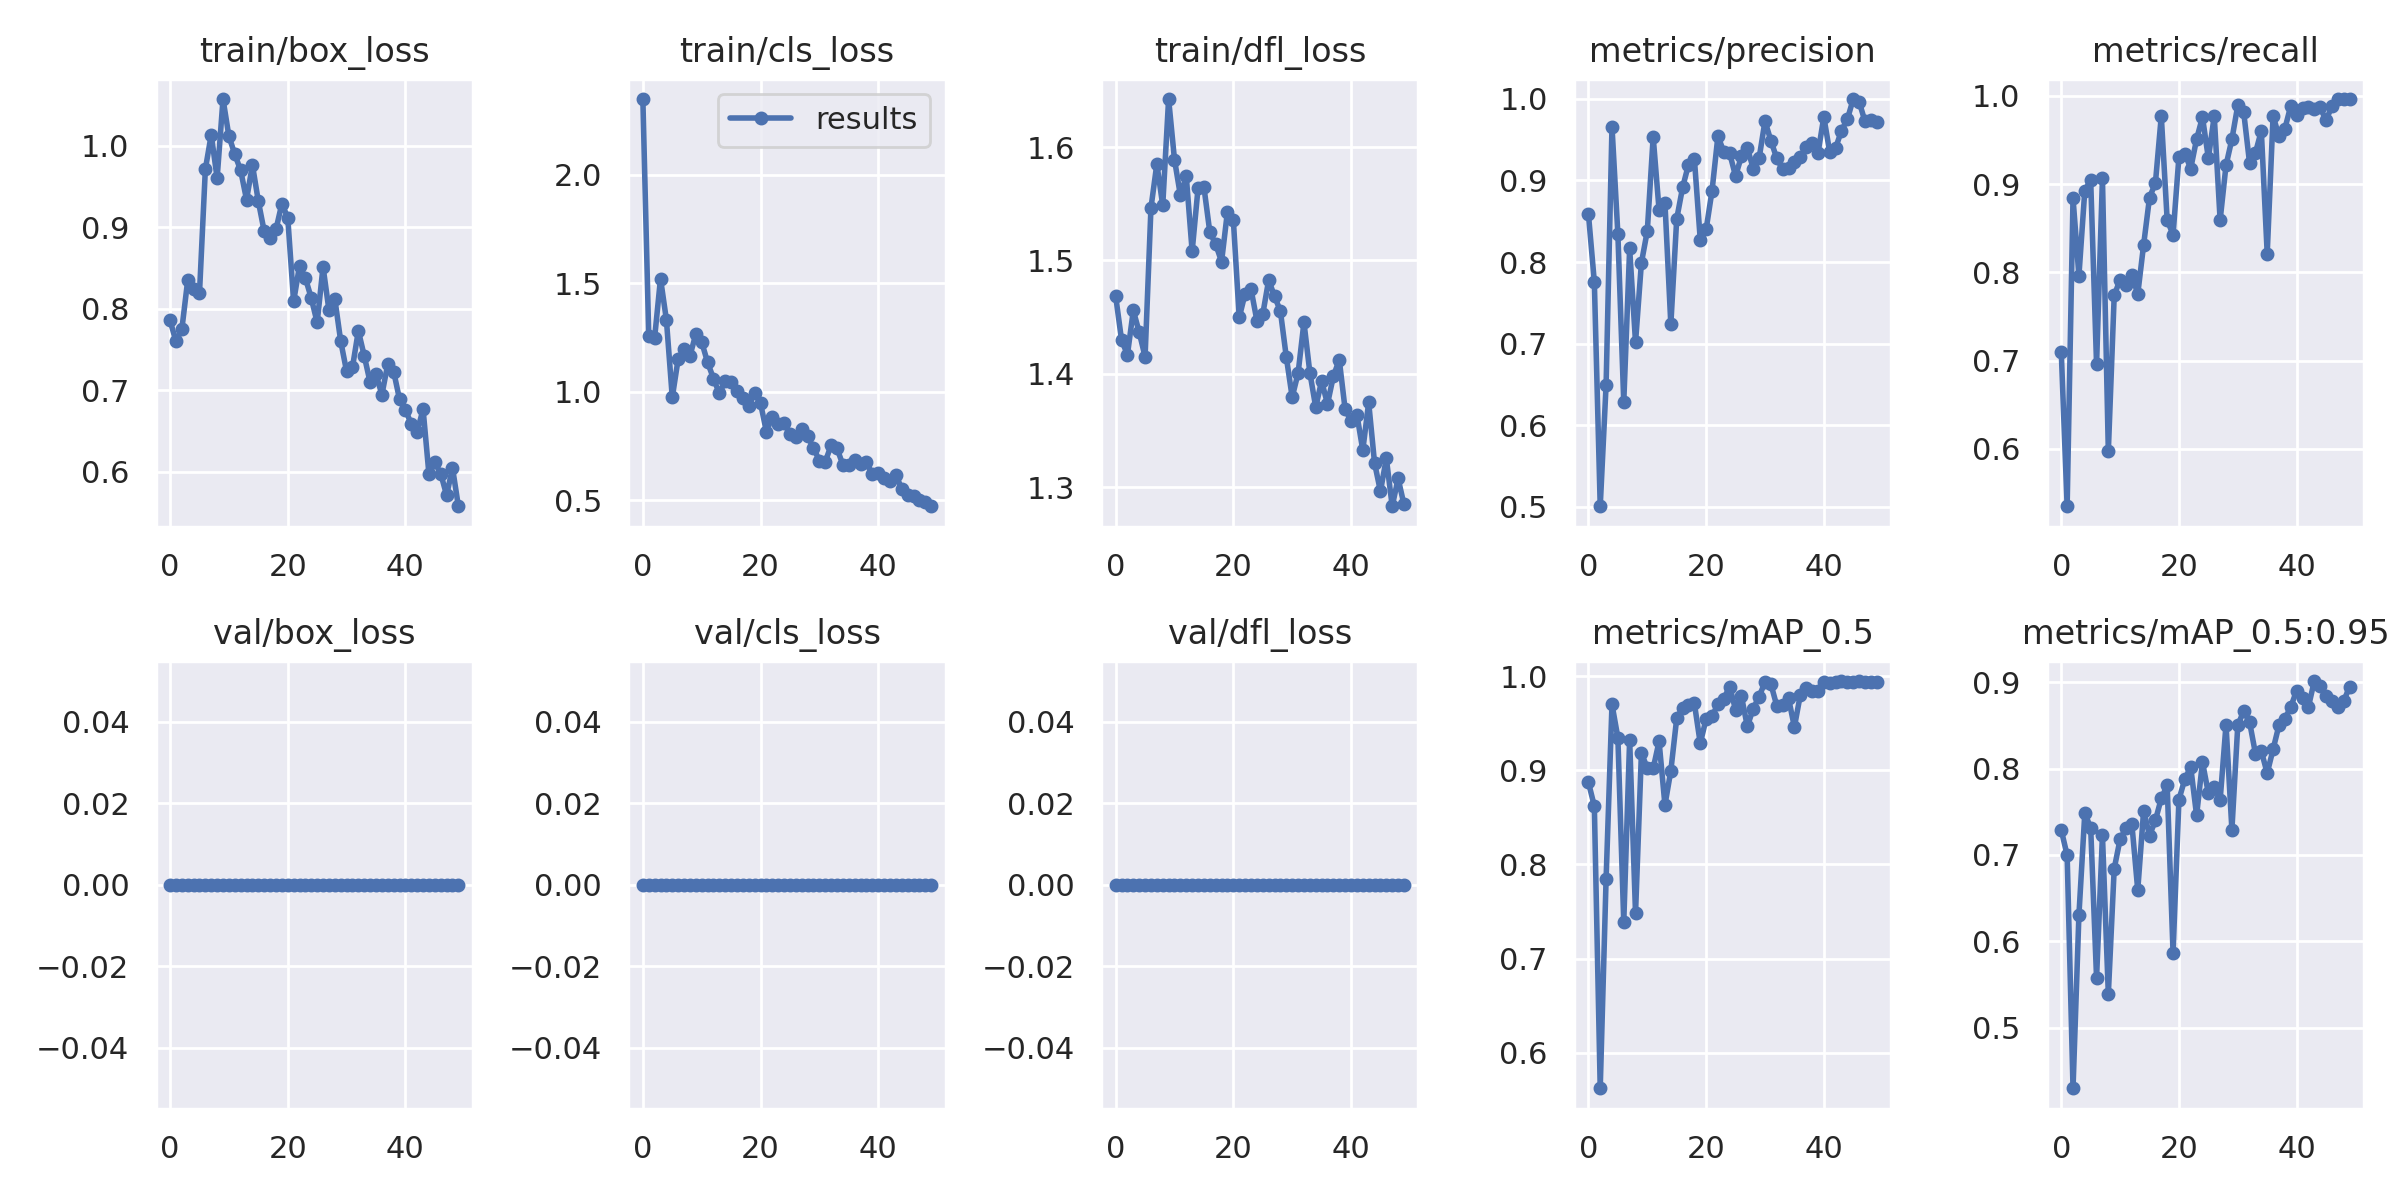

In [10]:
from IPython.display import Image
Image(filename="/content/yolov9/runs/train/exp/results.png",width=600)

In [25]:
!python detect_dual.py --img 1280 --conf 0.3 --device 0 --weights /content/yolov9/runs/train/exp/weights/best.pt --source /content/yolov9/furniture-2/test/images

detect_dual: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/furniture-2/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 604 layers, 50702898 parameters, 0 gradients, 236.6 GFLOPs
image 1/74 /content/yolov9/furniture-2/test/images/Chair--269-_jpg.rf.87aa2b7101b1fd216cd9762a0283f4ad.jpg: 1280x1280 1 Sandalye, 221.1ms
image 2/74 /content/yolov9/furniture-2/test/images/Chair--270-_jpg.rf.77fe75ee33dd358303bd3406412ff8dd.jpg: 1280x1280 1 Sandalye, 221.1ms
image 3/74 /content/yolov9/f

In [24]:
%pwd

'/content/yolov9'